In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

Using TensorFlow backend.


In [3]:
df = pd.read_csv('BreastCancerData (4).csv')

In [4]:
df.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2388.0,41.029313,7.694522,21.000000,35.000000,41.000000,48.000000,54.0
BMI,2388.0,24.723056,4.939623,8.543723,21.168699,24.453841,27.657793,69.5
BreastFeeding,2388.0,0.891122,0.311551,0.000000,1.000000,1.000000,1.000000,1.0
Marital Status,2388.0,1.126466,0.455754,1.000000,1.000000,1.000000,1.000000,3.0
Alcohol,2388.0,0.351340,0.477489,0.000000,0.000000,0.000000,1.000000,1.0
Smoking,2388.0,0.154941,0.361925,0.000000,0.000000,0.000000,0.000000,1.0
BreastCancerHistory,2388.0,0.029313,0.168718,0.000000,0.000000,0.000000,0.000000,1.0
Age at firstPeriod,2388.0,13.104690,1.684577,8.000000,12.000000,13.000000,14.000000,21.0
MenstrualCycle,2388.0,0.781826,0.413093,0.000000,1.000000,1.000000,1.000000,1.0
Cancer Positive,2388.0,0.404523,0.490902,0.000000,0.000000,0.000000,1.000000,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


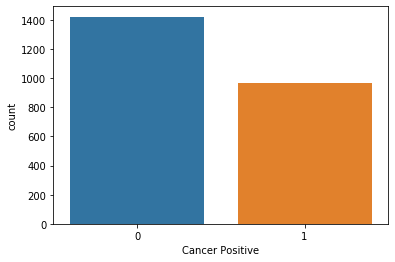

In [7]:
sns.countplot(x='Cancer Positive',data=df)

In [8]:
df.corr()['Cancer Positive'][:-1].sort_values()

MenstrualCycle        -0.527303
Age at firstPeriod    -0.143939
BreastFeeding         -0.125521
Alcohol                0.040402
Smoking                0.047929
BreastCancerHistory    0.145085
Marital Status         0.230007
BMI                    0.360163
Age                    0.387485
Name: Cancer Positive, dtype: float64

In [9]:
X = df.drop('Cancer Positive',axis=1).values
y = df['Cancer Positive'].values

In [10]:
X

array([[48.        ,  8.5437225 ,  1.        , ...,  0.        ,
        15.        ,  1.        ],
       [31.        , 10.20420723,  1.        , ...,  0.        ,
        12.        ,  1.        ],
       [31.        , 13.80713296,  1.        , ...,  0.        ,
        14.        ,  1.        ],
       ...,
       [51.        , 44.17113007,  0.        , ...,  1.        ,
        14.        ,  0.        ],
       [41.        , 57.76097459,  1.        , ...,  0.        ,
        13.        ,  1.        ],
       [35.        , 69.5       ,  1.        , ...,  1.        ,
        15.        ,  1.        ]])

In [11]:
X.shape

(2388, 9)

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
y.shape

(2388,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(1791, 9)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 1s 533us/sample - loss: 0.6916 - val_loss: 0.6826
Epoch 2/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.6698 - val_loss: 0.6654
Epoch 3/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.6536 - val_loss: 0.6496
Epoch 4/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6379 - val_loss: 0.6335
Epoch 5/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.6219 - val_loss: 0.6161
Epoch 6/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.6052 - val_loss: 0.5975
Epoch 7/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.5877 - val_loss: 0.5784
Epoch 8/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.5711 - val_loss: 0.5608
Epoch 9/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.5560 - val_lo

1791/1791 [==============================] - 0s 30us/sample - loss: 0.3321 - val_loss: 0.3102
Epoch 77/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3302 - val_loss: 0.3088
Epoch 78/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.3291 - val_loss: 0.3071
Epoch 79/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3282 - val_loss: 0.3074
Epoch 80/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3265 - val_loss: 0.3043
Epoch 81/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3251 - val_loss: 0.3054
Epoch 82/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.3239 - val_loss: 0.3035
Epoch 83/1000
1791/1791 [==============================] - 0s 36us/sample - loss: 0.3229 - val_loss: 0.3031
Epoch 84/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.3220 - val_loss: 0.3049
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 30us/sample - loss: 0.2803 - val_loss: 0.2740
Epoch 152/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2789 - val_loss: 0.2739
Epoch 153/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2778 - val_loss: 0.2743
Epoch 154/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2768 - val_loss: 0.2742
Epoch 155/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2768 - val_loss: 0.2734
Epoch 156/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2762 - val_loss: 0.2745
Epoch 157/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2758 - val_loss: 0.2731
Epoch 158/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2751 - val_loss: 0.2725
Epoch 159/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2743 - val_loss: 0.2720
Epoch 160/1000
1791/1791 [========

1791/1791 [==============================] - 0s 29us/sample - loss: 0.2364 - val_loss: 0.2370
Epoch 227/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2363 - val_loss: 0.2396
Epoch 228/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.2352 - val_loss: 0.2352
Epoch 229/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2355 - val_loss: 0.2404
Epoch 230/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2356 - val_loss: 0.2351
Epoch 231/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2339 - val_loss: 0.2351
Epoch 232/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2334 - val_loss: 0.2350
Epoch 233/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2329 - val_loss: 0.2324
Epoch 234/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2331 - val_loss: 0.2345
Epoch 235/1000
1791/1791 [========

1791/1791 [==============================] - 0s 23us/sample - loss: 0.2080 - val_loss: 0.2084
Epoch 302/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2090 - val_loss: 0.2058
Epoch 303/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2076 - val_loss: 0.2082
Epoch 304/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.2076 - val_loss: 0.2083
Epoch 305/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2077 - val_loss: 0.2079
Epoch 306/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2075 - val_loss: 0.2045
Epoch 307/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2056 - val_loss: 0.2071
Epoch 308/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2061 - val_loss: 0.2048
Epoch 309/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2057 - val_loss: 0.2067
Epoch 310/1000
1791/1791 [========

1791/1791 [==============================] - 0s 25us/sample - loss: 0.1903 - val_loss: 0.1886
Epoch 377/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1907 - val_loss: 0.1864
Epoch 378/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1903 - val_loss: 0.1863
Epoch 379/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1898 - val_loss: 0.1877
Epoch 380/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1903 - val_loss: 0.1848
Epoch 381/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1908 - val_loss: 0.1890
Epoch 382/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1899 - val_loss: 0.1852
Epoch 383/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1908 - val_loss: 0.1878
Epoch 384/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1896 - val_loss: 0.1860
Epoch 385/1000
1791/1791 [========

1791/1791 [==============================] - 0s 27us/sample - loss: 0.1800 - val_loss: 0.1754
Epoch 452/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.1808 - val_loss: 0.1751
Epoch 453/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1806 - val_loss: 0.1736
Epoch 454/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1811 - val_loss: 0.1757
Epoch 455/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1799 - val_loss: 0.1739
Epoch 456/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1797 - val_loss: 0.1734
Epoch 457/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1807 - val_loss: 0.1774
Epoch 458/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1806 - val_loss: 0.1733
Epoch 459/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1788 - val_loss: 0.1736
Epoch 460/1000
1791/1791 [========

1791/1791 [==============================] - 0s 30us/sample - loss: 0.1743 - val_loss: 0.1686
Epoch 527/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1730 - val_loss: 0.1649
Epoch 528/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1724 - val_loss: 0.1658
Epoch 529/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1721 - val_loss: 0.1641
Epoch 530/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1716 - val_loss: 0.1638
Epoch 531/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1715 - val_loss: 0.1643
Epoch 532/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1719 - val_loss: 0.1635
Epoch 533/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1723 - val_loss: 0.1664
Epoch 534/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1714 - val_loss: 0.1630
Epoch 535/1000
1791/1791 [========

1791/1791 [==============================] - 0s 25us/sample - loss: 0.1648 - val_loss: 0.1587
Epoch 602/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1649 - val_loss: 0.1569
Epoch 603/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1645 - val_loss: 0.1582
Epoch 604/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1649 - val_loss: 0.1592
Epoch 605/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1665 - val_loss: 0.1572
Epoch 606/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1656 - val_loss: 0.1572
Epoch 607/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1645 - val_loss: 0.1571
Epoch 608/1000
1791/1791 [==============================] - 0s 22us/sample - loss: 0.1641 - val_loss: 0.1570
Epoch 609/1000
1791/1791 [==============================] - 0s 22us/sample - loss: 0.1641 - val_loss: 0.1572
Epoch 610/1000
1791/1791 [========

1791/1791 [==============================] - 0s 22us/sample - loss: 0.1575 - val_loss: 0.1536
Epoch 677/1000
1791/1791 [==============================] - 0s 20us/sample - loss: 0.1573 - val_loss: 0.1530
Epoch 678/1000
1791/1791 [==============================] - 0s 22us/sample - loss: 0.1579 - val_loss: 0.1525
Epoch 679/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1578 - val_loss: 0.1524
Epoch 680/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1578 - val_loss: 0.1523
Epoch 681/1000
1791/1791 [==============================] - 0s 19us/sample - loss: 0.1571 - val_loss: 0.1519
Epoch 682/1000
1791/1791 [==============================] - 0s 22us/sample - loss: 0.1571 - val_loss: 0.1548
Epoch 683/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1589 - val_loss: 0.1516
Epoch 684/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1582 - val_loss: 0.1582
Epoch 685/1000
1791/1791 [========

1791/1791 [==============================] - 0s 29us/sample - loss: 0.1509 - val_loss: 0.1506
Epoch 752/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1499 - val_loss: 0.1482
Epoch 753/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1497 - val_loss: 0.1485
Epoch 754/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1498 - val_loss: 0.1510
Epoch 755/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1505 - val_loss: 0.1491
Epoch 756/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1496 - val_loss: 0.1494
Epoch 757/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1495 - val_loss: 0.1487
Epoch 758/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1505 - val_loss: 0.1499
Epoch 759/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1506 - val_loss: 0.1507
Epoch 760/1000
1791/1791 [========

1791/1791 [==============================] - 0s 31us/sample - loss: 0.1462 - val_loss: 0.1477
Epoch 827/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1456 - val_loss: 0.1481
Epoch 828/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1449 - val_loss: 0.1473
Epoch 829/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1447 - val_loss: 0.1482
Epoch 830/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1447 - val_loss: 0.1472
Epoch 831/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1447 - val_loss: 0.1483
Epoch 832/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1445 - val_loss: 0.1462
Epoch 833/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1446 - val_loss: 0.1479
Epoch 834/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1443 - val_loss: 0.1472
Epoch 835/1000
1791/1791 [========

1791/1791 [==============================] - 0s 30us/sample - loss: 0.1437 - val_loss: 0.1537
Epoch 902/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1420 - val_loss: 0.1443
Epoch 903/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1411 - val_loss: 0.1500
Epoch 904/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1408 - val_loss: 0.1445
Epoch 905/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1417 - val_loss: 0.1519
Epoch 906/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1432 - val_loss: 0.1443
Epoch 907/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1418 - val_loss: 0.1459
Epoch 908/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1417 - val_loss: 0.1464
Epoch 909/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1420 - val_loss: 0.1470
Epoch 910/1000
1791/1791 [========

1791/1791 [==============================] - 0s 28us/sample - loss: 0.1388 - val_loss: 0.1448
Epoch 977/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1383 - val_loss: 0.1437
Epoch 978/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1383 - val_loss: 0.1450
Epoch 979/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1386 - val_loss: 0.1448
Epoch 980/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1376 - val_loss: 0.1457
Epoch 981/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1374 - val_loss: 0.1440
Epoch 982/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1376 - val_loss: 0.1456
Epoch 983/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1380 - val_loss: 0.1455
Epoch 984/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1378 - val_loss: 0.1460
Epoch 985/1000
1791/1791 [========

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.691628,0.682584
1,0.669787,0.665394
2,0.653566,0.649646
3,0.637872,0.633500
4,0.621924,0.616128
...,...,...
995,0.136354,0.149050
996,0.141163,0.143070
997,0.138270,0.145497
998,0.136764,0.146046


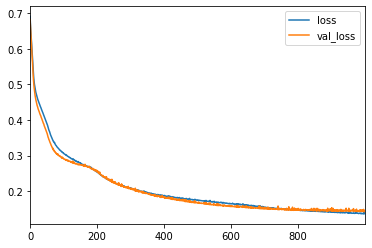

In [26]:
losses.plot()

In [27]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [30]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),
         callbacks=[early_stop],batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 1s 407us/sample - loss: 0.9421 - val_loss: 0.8957
Epoch 2/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.8887 - val_loss: 0.8502
Epoch 3/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.8410 - val_loss: 0.8047
Epoch 4/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.7936 - val_loss: 0.7586
Epoch 5/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.7493 - val_loss: 0.7184
Epoch 6/1000
1791/1791 [==============================] - ETA: 0s - loss: 0.752 - 0s 31us/sample - loss: 0.7100 - val_loss: 0.6832
Epoch 7/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.6760 - val_loss: 0.6510
Epoch 8/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6455 - val_loss: 0.6202
Epoch 9/1000
1791/1791 [==============================] - 0s 31us/sample

1791/1791 [==============================] - 0s 33us/sample - loss: 0.2981 - val_loss: 0.2952
Epoch 77/1000
1791/1791 [==============================] - 0s 36us/sample - loss: 0.2970 - val_loss: 0.2947
Epoch 78/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2962 - val_loss: 0.2959
Epoch 79/1000
1791/1791 [==============================] - 0s 37us/sample - loss: 0.2956 - val_loss: 0.2950
Epoch 80/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2954 - val_loss: 0.2935
Epoch 81/1000
1791/1791 [==============================] - 0s 40us/sample - loss: 0.2946 - val_loss: 0.2943
Epoch 82/1000
1791/1791 [==============================] - 0s 36us/sample - loss: 0.2938 - val_loss: 0.2939
Epoch 83/1000
1791/1791 [==============================] - 0s 38us/sample - loss: 0.2929 - val_loss: 0.2913
Epoch 84/1000
1791/1791 [==============================] - 0s 38us/sample - loss: 0.2934 - val_loss: 0.2929
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 31us/sample - loss: 0.2605 - val_loss: 0.2680
Epoch 152/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2605 - val_loss: 0.2660
Epoch 153/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2602 - val_loss: 0.2670
Epoch 154/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2612 - val_loss: 0.2644
Epoch 155/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2602 - val_loss: 0.2644
Epoch 156/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2596 - val_loss: 0.2678
Epoch 157/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2588 - val_loss: 0.2618
Epoch 158/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2591 - val_loss: 0.2645
Epoch 159/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.2594 - val_loss: 0.2627
Epoch 160/1000
1791/1791 [========

1791/1791 [==============================] - 0s 29us/sample - loss: 0.2385 - val_loss: 0.2395
Epoch 227/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2385 - val_loss: 0.2470
Epoch 228/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2383 - val_loss: 0.2380
Epoch 229/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2374 - val_loss: 0.2409
Epoch 230/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2376 - val_loss: 0.2384
Epoch 231/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2379 - val_loss: 0.2371
Epoch 232/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2370 - val_loss: 0.2391
Epoch 233/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2365 - val_loss: 0.2381
Epoch 234/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2363 - val_loss: 0.2420
Epoch 235/1000
1791/1791 [========

1791/1791 [==============================] - 0s 26us/sample - loss: 0.2246 - val_loss: 0.2224
Epoch 302/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.2233 - val_loss: 0.2237
Epoch 303/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.2235 - val_loss: 0.2213
Epoch 304/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.2230 - val_loss: 0.2216
Epoch 305/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2233 - val_loss: 0.2238
Epoch 306/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2227 - val_loss: 0.2217
Epoch 307/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2235 - val_loss: 0.2278
Epoch 308/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2224 - val_loss: 0.2208
Epoch 309/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2225 - val_loss: 0.2285
Epoch 310/1000
1791/1791 [========

1791/1791 [==============================] - 0s 30us/sample - loss: 0.2099 - val_loss: 0.2097
Epoch 377/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2101 - val_loss: 0.2105
Epoch 378/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2100 - val_loss: 0.2095
Epoch 379/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.2099 - val_loss: 0.2066
Epoch 380/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.2103 - val_loss: 0.2133
Epoch 381/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2099 - val_loss: 0.2076
Epoch 382/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2100 - val_loss: 0.2107
Epoch 383/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2114 - val_loss: 0.2141
Epoch 384/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.2100 - val_loss: 0.2058
Epoch 385/1000
1791/1791 [========

1791/1791 [==============================] - 0s 25us/sample - loss: 0.1968 - val_loss: 0.1948
Epoch 452/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1979 - val_loss: 0.1978
Epoch 453/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1976 - val_loss: 0.1943
Epoch 454/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1970 - val_loss: 0.1977
Epoch 455/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1969 - val_loss: 0.1936
Epoch 456/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1967 - val_loss: 0.1978
Epoch 457/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1972 - val_loss: 0.1963
Epoch 458/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1965 - val_loss: 0.1937
Epoch 459/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1975 - val_loss: 0.2006
Epoch 460/1000
1791/1791 [========

1791/1791 [==============================] - 0s 26us/sample - loss: 0.1857 - val_loss: 0.1905
Epoch 527/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1859 - val_loss: 0.1829
Epoch 528/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1845 - val_loss: 0.1819
Epoch 529/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1850 - val_loss: 0.1792
Epoch 530/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1856 - val_loss: 0.1815
Epoch 531/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1850 - val_loss: 0.1815
Epoch 532/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1847 - val_loss: 0.1868
Epoch 533/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1845 - val_loss: 0.1793
Epoch 534/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1836 - val_loss: 0.1820
Epoch 535/1000
1791/1791 [========

1791/1791 [==============================] - 0s 27us/sample - loss: 0.1704 - val_loss: 0.1693
Epoch 602/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1711 - val_loss: 0.1672
Epoch 603/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1709 - val_loss: 0.1679
Epoch 604/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1710 - val_loss: 0.1669
Epoch 605/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1706 - val_loss: 0.1747
Epoch 606/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1715 - val_loss: 0.1673
Epoch 607/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1699 - val_loss: 0.1686
Epoch 608/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1695 - val_loss: 0.1733
Epoch 609/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1762 - val_loss: 0.1656
Epoch 610/1000
1791/1791 [========

1791/1791 [==============================] - 0s 32us/sample - loss: 0.1594 - val_loss: 0.1571
Epoch 677/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1593 - val_loss: 0.1538
Epoch 678/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1597 - val_loss: 0.1549
Epoch 679/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1583 - val_loss: 0.1559
Epoch 680/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1590 - val_loss: 0.1585
Epoch 681/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1584 - val_loss: 0.1536
Epoch 682/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1601 - val_loss: 0.1543
Epoch 683/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1584 - val_loss: 0.1559
Epoch 684/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1582 - val_loss: 0.1559
Epoch 685/1000
1791/1791 [========

1791/1791 [==============================] - 0s 28us/sample - loss: 0.1513 - val_loss: 0.1458
Epoch 752/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1515 - val_loss: 0.1516
Epoch 753/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1502 - val_loss: 0.1459
Epoch 754/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1505 - val_loss: 0.1456
Epoch 755/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1501 - val_loss: 0.1468
Epoch 756/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1495 - val_loss: 0.1513
Epoch 757/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1503 - val_loss: 0.1454
Epoch 758/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1510 - val_loss: 0.1505
Epoch 759/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1522 - val_loss: 0.1541
Epoch 760/1000
1791/1791 [========

1791/1791 [==============================] - 0s 27us/sample - loss: 0.1446 - val_loss: 0.1425
Epoch 827/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1442 - val_loss: 0.1406
Epoch 828/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1426 - val_loss: 0.1418
Epoch 829/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1427 - val_loss: 0.1435
Epoch 830/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1436 - val_loss: 0.1400
Epoch 831/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1432 - val_loss: 0.1419
Epoch 832/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1430 - val_loss: 0.1446
Epoch 833/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1426 - val_loss: 0.1399
Epoch 834/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1426 - val_loss: 0.1409
Epoch 835/1000
1791/1791 [========

1791/1791 [==============================] - 0s 27us/sample - loss: 0.1365 - val_loss: 0.1430
Epoch 902/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1343 - val_loss: 0.1342
Epoch 903/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1343 - val_loss: 0.1425
Epoch 904/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1355 - val_loss: 0.1342
Epoch 905/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1361 - val_loss: 0.1370
Epoch 906/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1360 - val_loss: 0.1370
Epoch 907/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1359 - val_loss: 0.1385
Epoch 908/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1345 - val_loss: 0.1361
Epoch 909/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1338 - val_loss: 0.1347
Epoch 910/1000
1791/1791 [========

1791/1791 [==============================] - 0s 26us/sample - loss: 0.1301 - val_loss: 0.1332
Epoch 977/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1292 - val_loss: 0.1317
Epoch 978/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1291 - val_loss: 0.1327
Epoch 979/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1287 - val_loss: 0.1337
Epoch 980/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1296 - val_loss: 0.1349
Epoch 981/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1285 - val_loss: 0.1337
Epoch 982/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1282 - val_loss: 0.1330
Epoch 983/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1285 - val_loss: 0.1323
Epoch 984/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1282 - val_loss: 0.1311
Epoch 985/1000
1791/1791 [========

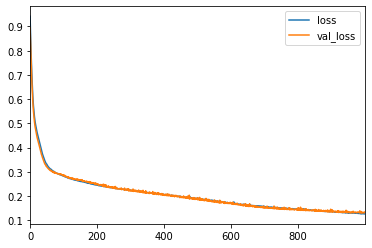

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
predictions

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[344   5]
 [ 20 228]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.96       349
           1       0.98      0.92      0.95       248

    accuracy                           0.96       597
   macro avg       0.96      0.95      0.96       597
weighted avg       0.96      0.96      0.96       597



In [37]:
from tensorflow.keras.models import load_model

In [38]:
model.save('final_ANN_model1.h5')

In [39]:
import joblib
joblib.dump(scaler,'ANN_scaler.pkl')

['ANN_scaler.pkl']

In [40]:
new_data = df.drop('Cancer Positive',axis=1).iloc[1]

In [41]:
new_data

Age                    31.000000
BMI                    10.204207
BreastFeeding           1.000000
Marital Status          1.000000
Alcohol                 0.000000
Smoking                 0.000000
BreastCancerHistory     0.000000
Age at firstPeriod     12.000000
MenstrualCycle          1.000000
Name: 1, dtype: float64

In [42]:
new_data = scaler.transform(new_data.values.reshape(-1,9))

In [43]:
new_data

array([[0.28125   , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.30769231, 1.        ]])

In [44]:
model.predict(new_data)

array([[0.00055713]], dtype=float32)

In [45]:
model.predict_classes(new_data)

array([[0]])

In [46]:
model.predict_proba(new_data)[0][0]*100

0.055713055189698935

In [47]:
later_model = load_model('final_ANN_model1.h5')

In [48]:
later_model.predict(new_data)

array([[0.00055713]], dtype=float32)